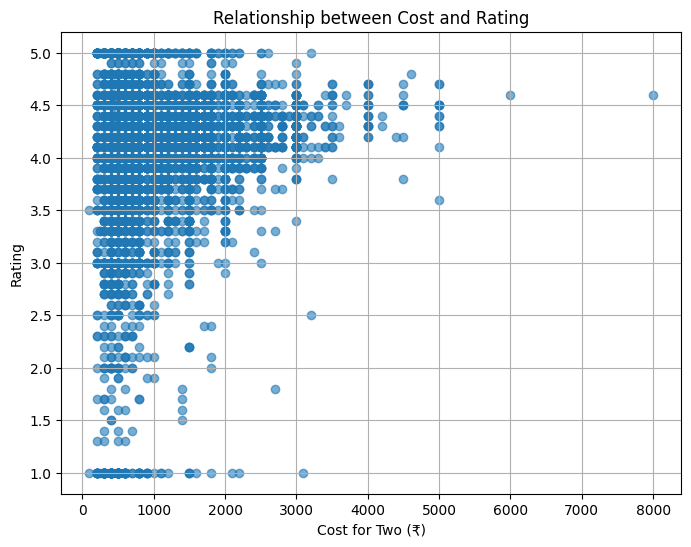

In [12]:
import pandas as pd

# Try reading with a safe encoding
df = pd.read_csv("restaurants (2).csv", encoding='latin1')

# Check first few rows
df.head()
df = pd.read_csv("restaurants (2).csv", encoding='ISO-8859-1')

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Cost'], df['Rating'], alpha=0.6)
plt.title("Relationship between Cost and Rating")
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


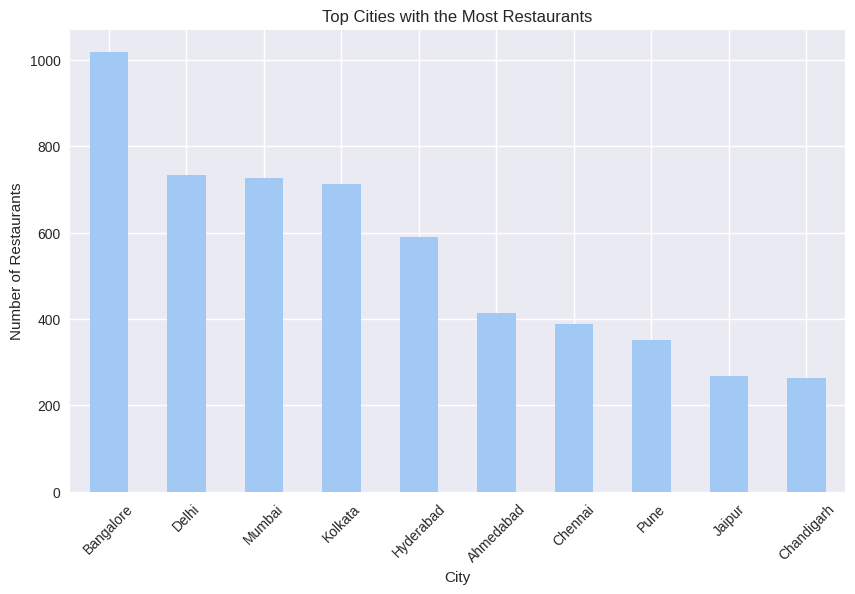

In [14]:
# -------------------
# IMPORT LIBRARIES
# -------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------
# LOAD DATA
# -------------------
# Replace filename with your uploaded file name
df = pd.read_csv("restaurants (2).csv", encoding='latin1')

# Clean and prepare data
df.columns = df.columns.str.strip()
df.dropna(subset=['City', 'Rating', 'Cuisine', 'Cost'], inplace=True)

plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

# -------------------
# 1. Cities with the most restaurants
# -------------------
plt.figure(figsize=(10,6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title("Top Cities with the Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

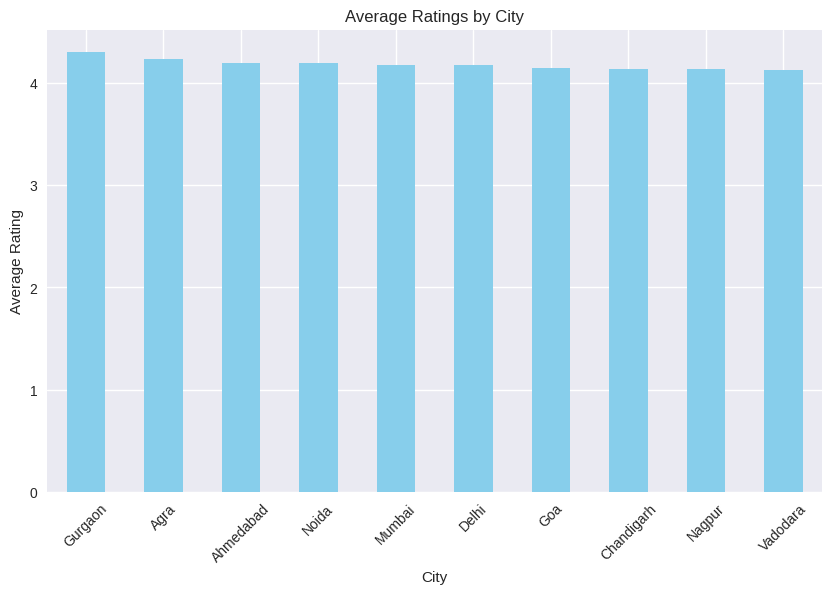

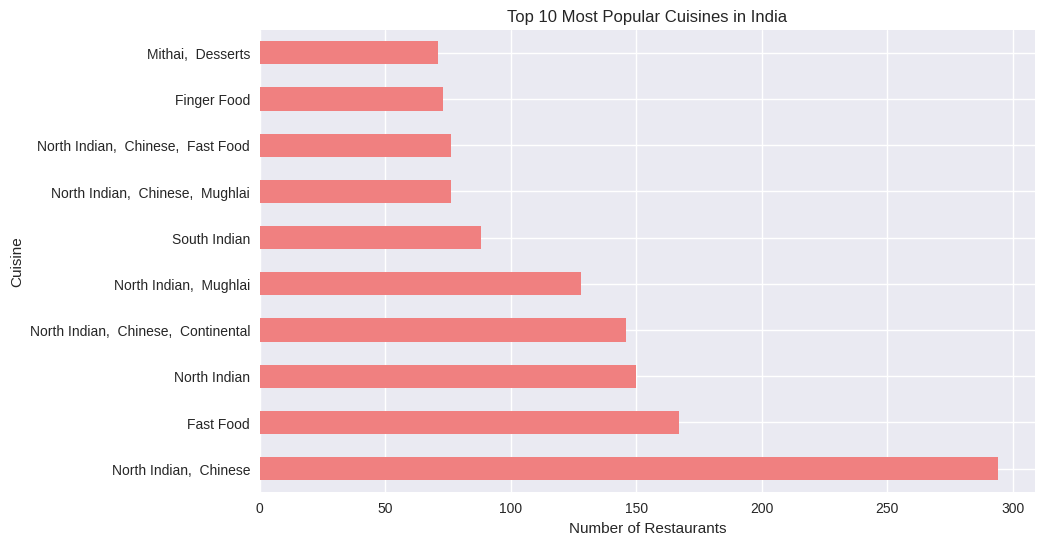

In [15]:
# -------------------
# 2. Average ratings by city
# -------------------
plt.figure(figsize=(10,6))
avg_rating_city = df.groupby('City')['Rating'].mean().sort_values(ascending=False).head(10)
avg_rating_city.plot(kind='bar', color='skyblue')
plt.title("Average Ratings by City")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# -------------------
# 3. Most popular cuisines
# -------------------
plt.figure(figsize=(10,6))
df['Cuisine'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Most Popular Cuisines in India")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


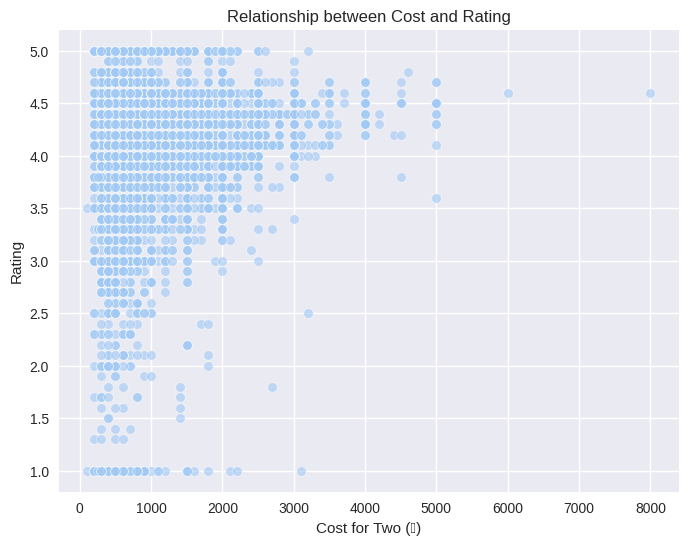

In [17]:
# -------------------
# 4. Relationship between cost and rating
# -------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cost', y='Rating', alpha=0.6)
plt.title("Relationship between Cost and Rating")
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Rating")
plt.show()


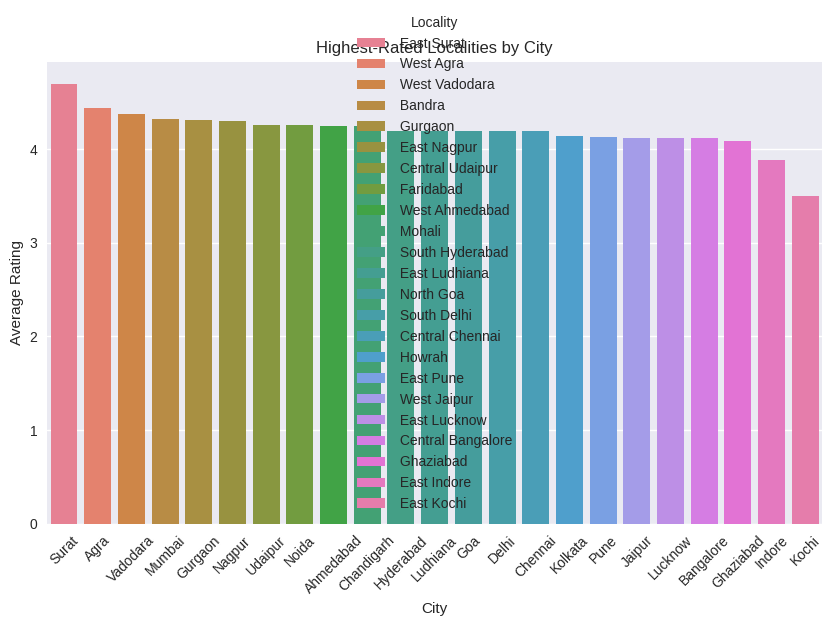

In [18]:
# -------------------
# 5. Highest-rated localities by city
# -------------------
plt.figure(figsize=(10,6))
top_localities = df.groupby(['City', 'Locality'])['Rating'].mean().reset_index()
top_localities = top_localities.sort_values('Rating', ascending=False).groupby('City').head(1)
sns.barplot(data=top_localities, x='City', y='Rating', hue='Locality', dodge=False)
plt.title("Highest-Rated Localities by City")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.legend(title='Locality')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1721493914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_votes, x='Name', y='Votes', palette='cool')


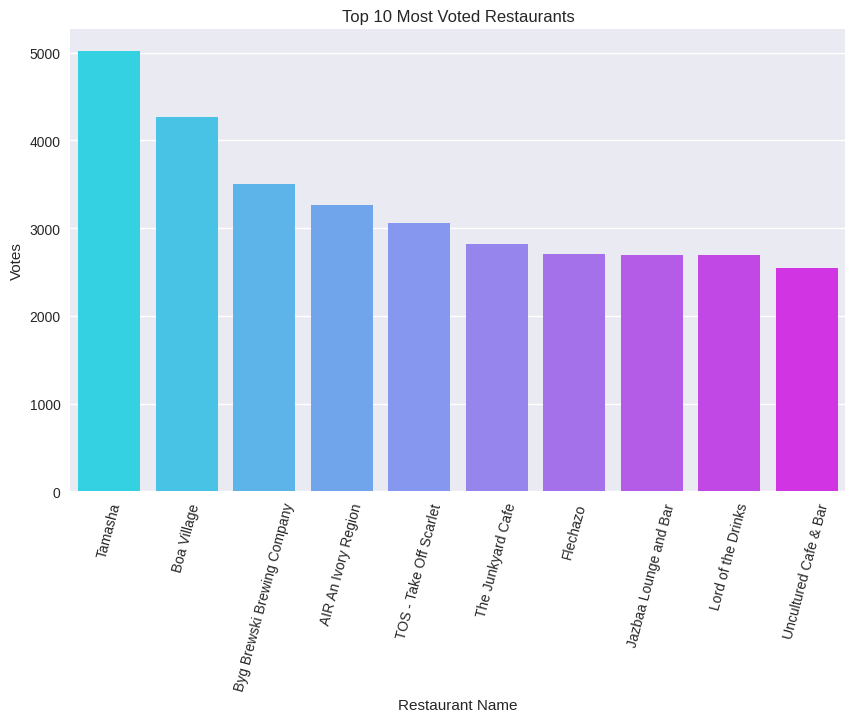

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


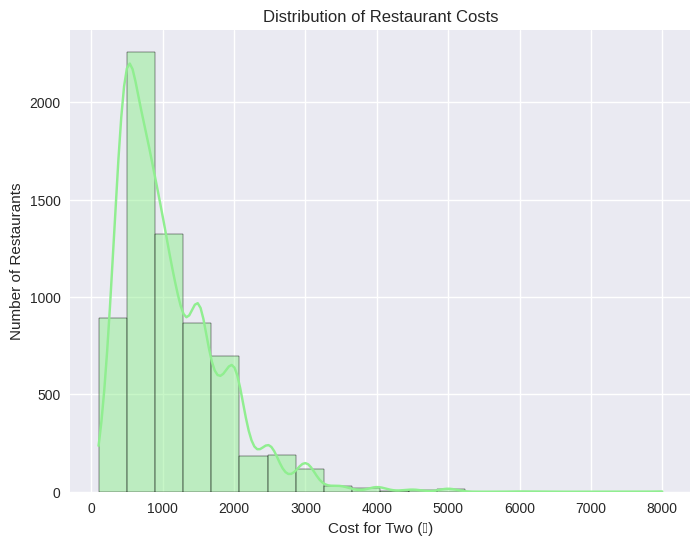

In [19]:
# -------------------
# 6. Top 10 restaurants by votes
# -------------------
plt.figure(figsize=(10,6))
top_votes = df.nlargest(10, 'Votes')
sns.barplot(data=top_votes, x='Name', y='Votes', palette='cool')
plt.title("Top 10 Most Voted Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Votes")
plt.xticks(rotation=75)
plt.show()

# -------------------
# 7. Distribution of restaurant costs
# -------------------
plt.figure(figsize=(8,6))
sns.histplot(df['Cost'], bins=20, kde=True, color='lightgreen')
plt.title("Distribution of Restaurant Costs")
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Number of Restaurants")
plt.show()


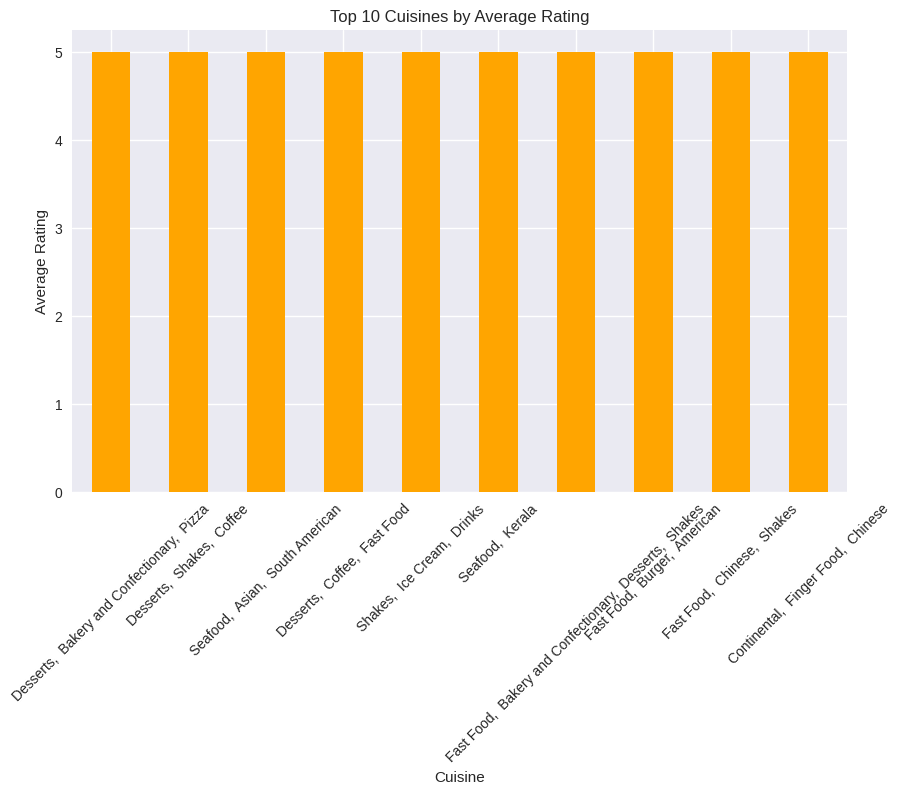

In [20]:
# -------------------
# 8. Best average-rated cuisines
# -------------------
plt.figure(figsize=(10,6))
best_cuisines = df.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False).head(10)
best_cuisines.plot(kind='bar', color='orange')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


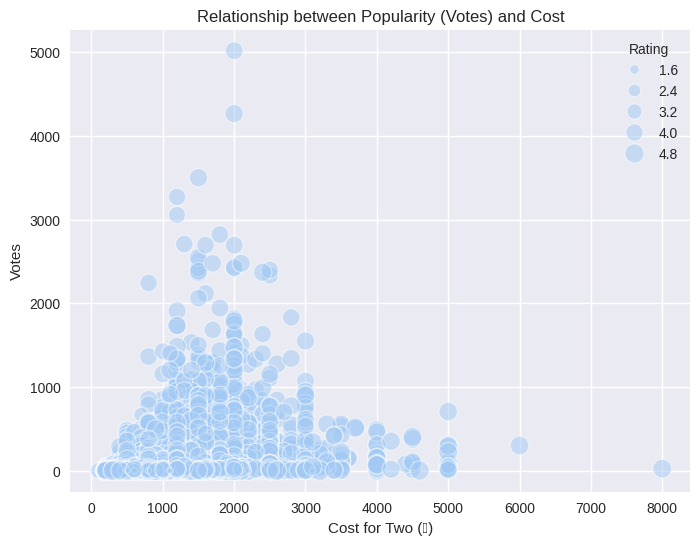

In [22]:
# -------------------
# 9. Relationship between popularity (votes) and cost
# -------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cost', y='Votes', size='Rating', alpha=0.5, sizes=(20, 200))
plt.title("Relationship between Popularity (Votes) and Cost")
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Votes")
plt.show()


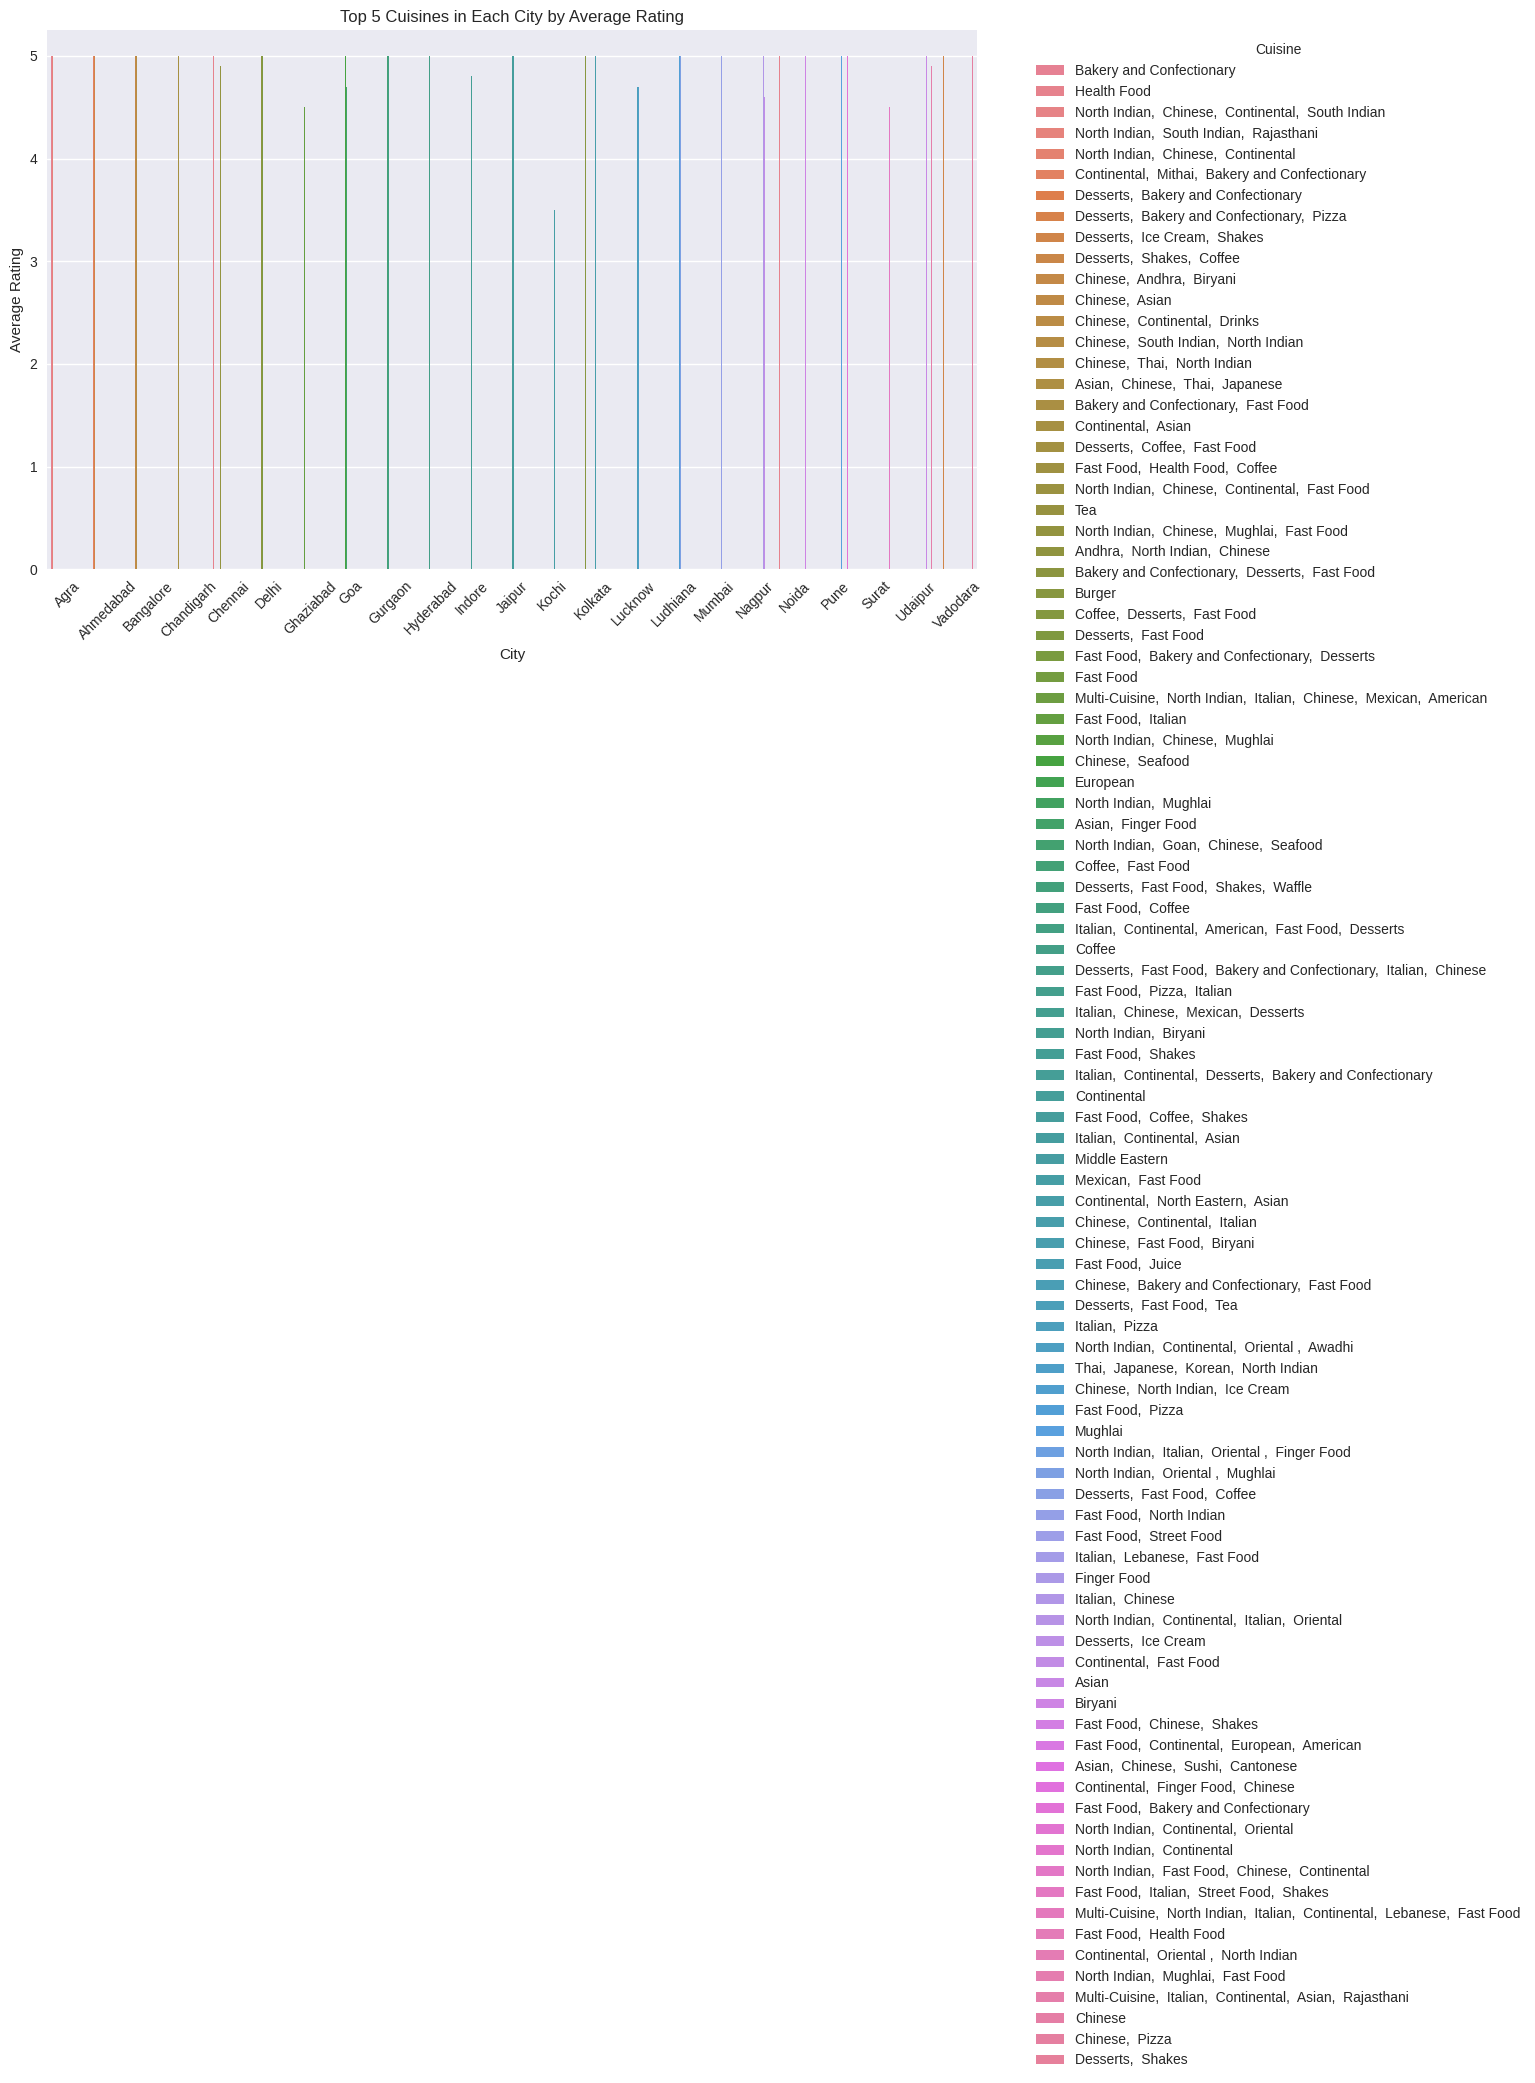

In [26]:
# -------------------
# 10. Top 5 cuisines in each city by average rating
# -------------------
plt.figure(figsize=(12,7))
top5_cuisine_city = (
    df.groupby(['City', 'Cuisine'])['Rating']
    .mean()
    .reset_index()
    .sort_values(['City', 'Rating'], ascending=[True, False])
    .groupby('City')
    .head(5)
)

sns.barplot(data=top5_cuisine_city, x='City', y='Rating', hue='Cuisine')
plt.title("Top 5 Cuisines in Each City by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title="Cuisine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()